In [1]:
import pandas as pd
import numpy as np
import nltk
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

In [2]:
movies = pd.read_csv('IMDB Dataset.csv')
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
movies.isnull().sum()

review       0
sentiment    0
dtype: int64

In [4]:
movies.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
movies.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
movies.sentiment=movies.sentiment.apply(lambda x : 0 if x=='negative' else 1)

In [7]:
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Feature Engineering

In [8]:
stop_words = set (stopwords.words('english'))

#sentence_count
movies['sentence_count']= movies.review.apply(lambda x : len(re.findall('\n',str(x)))+1)

In [9]:
#word_count in each review comment
movies['word_count']= movies.review.apply(lambda x : len(str(x).split()))

In [10]:
#unique_word_count
movies['unique_word_count']=movies.review.apply(lambda  x: len(set(str(x).split())))

In [11]:
#letter_count
movies['letter_count']= movies.review.apply(lambda x : len(str(x)))

In [12]:
#punctuation_count
movies['punctuation_count']= movies.review.apply(lambda x : len([c for c in str(x) if c in string.punctuation]))

In [13]:
#uppercase_count of words
movies['uppercase_count']= movies.review.apply(lambda x : len([w for w in str(x).split() if w.isupper()]))

In [14]:
#titlecase word count
movies['title_case']= movies.review.apply(lambda x : len([w for w in str(x).split() if w.istitle()]) )

In [15]:
#stopwords count
movies['stopwords_count']= movies.review.apply(lambda x : len([w for w in str(x).lower().split() if w in stop_words]))

In [16]:
#Average length of words
movies['average_length']= movies.review.apply(lambda x : np.mean([len(w) for w in str(x).split()]))

In [17]:
#Word count % in each comment (Derived feature)
movies['unique_word_pct']= (movies['unique_word_count']/movies['word_count'])*100

In [18]:
#Punctuation percent in each review comment (Derived Feature)
movies['punctuation_pct']= (movies['punctuation_count']/movies['word_count'])*100

In [19]:
movies.head()

,review,sentiment,sentence_count,word_count,unique_word_count,letter_count,punctuation_count,uppercase_count,title_case,stopwords_count,average_length,unique_word_pct,punctuation_pct
0,One of the other reviewers has mentioned that ...,1,1,307,208,1761,78,8,36,133,4.739414,67.752443,25.407166
1,A wonderful little production. <br /><br />The...,1,1,162,114,998,44,2,12,66,5.166667,70.370370,27.160494
2,I thought this was a wonderful way to spend ti...,1,1,166,121,926,40,3,20,76,4.584337,72.891566,24.096386
3,Basically there's a family where a little boy ...,0,1,138,96,748,42,3,13,62,4.427536,69.565217,30.434783
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1,230,152,1317,56,1,31,96,4.730435,66.086957,24.347826


### Data Visualization

Text(0.5, 1.0, 'Distribution of Words in Reviews')

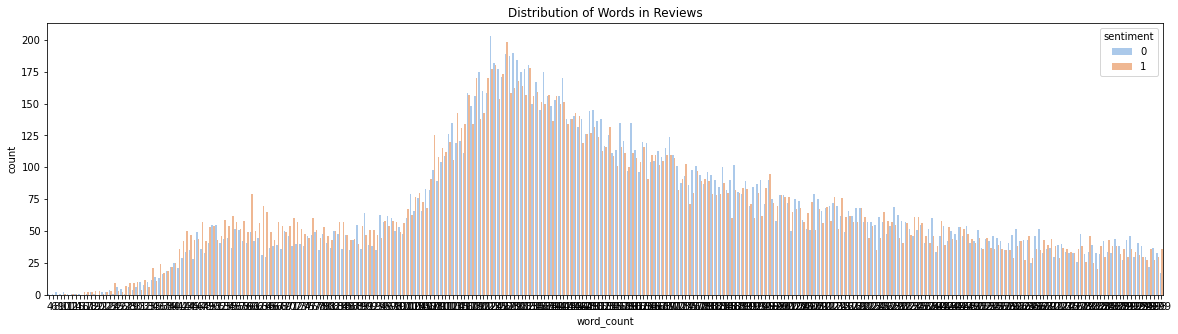

In [20]:
plt.figure(figsize=(20, 5))
data=movies[movies.word_count<300]
ax = sns.countplot(x="word_count",  hue='sentiment', data=data, palette="pastel")
plt.title("Distribution of Words in Reviews")

Text(0.5, 1.0, 'Distribution of Punctuations in review across review sentiment')

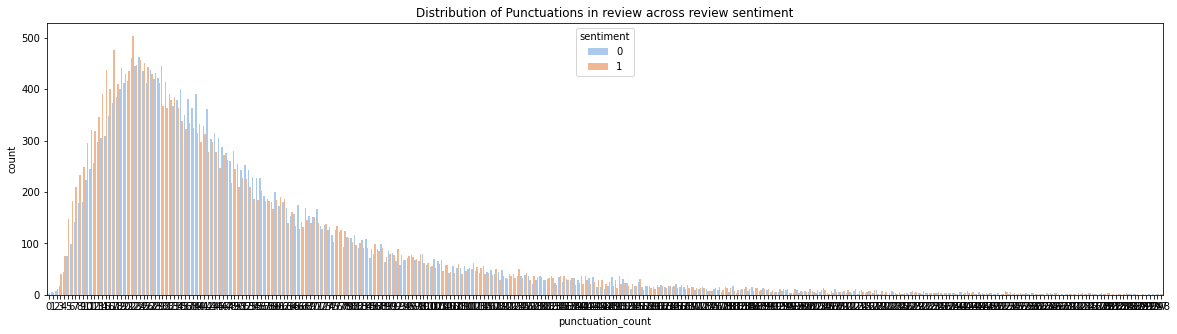

In [21]:
plt.figure(figsize=(20, 5))
data=movies[movies.punctuation_count<300]
ax = sns.countplot(x="punctuation_count",  hue='sentiment', data=data, palette="pastel")
plt.title("Distribution of Punctuations in review across review sentiment")

Text(0.5, 1.0, 'Distribution of Stopwords in review across review sentiment')

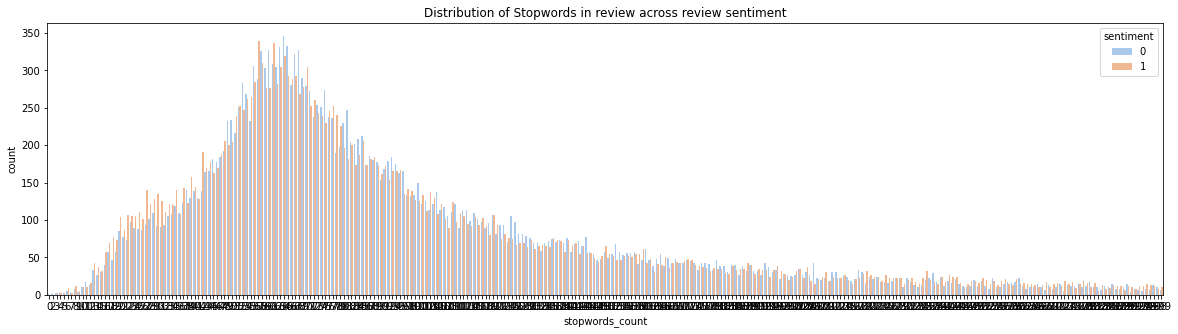

In [22]:
plt.figure(figsize=(20, 5))
data=movies[movies.stopwords_count<300]
ax = sns.countplot(x="stopwords_count",  hue='sentiment', data=data, palette="pastel")
plt.title("Distribution of Stopwords in review across review sentiment")

This shows each feature is almost similar for both the sentiments. No starling differences were observed for any feature. This also indicate that model comprising these features as explanatory variable will not yield good accuracy score. So to get good classification model, we have to develop machine learning or neural network model based on word vectorizer only.

### Text Pre-processing

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

TypeError: 'str' object is not callable

In [24]:
# Mapping for all the abbreviated words and slangs commonly used in chats/reviews/comments of people

mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
           "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is",
           "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", 
           "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have",
           "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am",
           "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
           "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
           "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
           "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
           "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
           "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
           "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
           "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
           "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
           "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
           "won't": "will not", "won't've": "will not have", "would've": "would have","wouldn't": "would not",
           "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", 
           "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [25]:
def preprocessing(text):
    text= ' '.join(mapping[t] if t in mapping else t for t in text.split(" "))
    text= text.lower()
    text= text.replace('<br />','')
    text= re.compile(r'https?://\S+|www\.\S+').sub(r'',text)
    text= re.compile('<.*?>').sub(r'',text)
    text= ' '.join([word for word in str(text).split() if word not in set(stopwords.words('english'))])
    text= text.translate(str.maketrans('','',string.punctuation))
    text= " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])

In [26]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def word_replace(text):
    return text.replace('<br />','')


from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])



from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])



def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)




In [27]:
def preprocess(text):
    text=clean_contractions(text,mapping)
    text=text.lower()
    text=word_replace(text)
    text=remove_urls(text)
    text=remove_html(text)
    text=remove_stopwords(text)
    text=remove_punctuation(text)
    text=lemmatize_words(text)
    
    return text

In [28]:
movies["reviews_processed"] = movies["review"].apply(lambda text: preprocess(text))

In [29]:
movies[['review','reviews_processed','sentiment']].head(10)

,review,reviews_processed,sentiment
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching 1 oz episode h...,1
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...,1
5,"Probably my all-time favorite movie, a story o...",probably alltime favorite movie story selfless...,1
6,I sure would like to see a resurrection of a u...,sure would like see resurrection dated seahunt...,1
7,"This show was an amazing, fresh & innovative i...",show amazing fresh innovative idea 70 first ai...,0
8,Encouraged by the positive comments about this...,encouraged positive comment film looking forwa...,0
9,If you like original gut wrenching laughter yo...,like original gut wrenching laughter like movi...,1


### Word Embeddings

In [30]:
from sklearn.model_selection import train_test_split

x=movies['reviews_processed']
y=movies['sentiment']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
[i.shape for i in [x_train,x_test,y_train,y_test]]

[(40000,), (10000,), (40000,), (10000,)]

#### CountVectorizer :

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer(max_features=10000,ngram_range=(1,3))
cv.fit(x)
cv_train=cv.transform(x_train)
cv_test= cv.transform(x_test)

In [33]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
print(cv_train.shape,cv_test.shape)

(40000, 10000) (10000, 10000)


#### TF-TDF (Term Frequency- Inverse Document Frequency):

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(max_features=10000,ngram_range=(1,3))
tfidf.fit(x)
tfidf_train=tfidf.transform(x_train)
tfidf_test= tfidf.transform(x_test)

In [36]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [37]:
len(tfidf.idf_)

10000

In [38]:
print(tfidf_train.shape,tfidf_test.shape)

(40000, 10000) (10000, 10000)


### Building Models

In [39]:
#Logistic Regression with CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

lr= LogisticRegression(penalty='l1',solver='saga')
lr.fit(cv_train,y_train)
y_pred_lr_cv= lr.predict(cv_test)
print(confusion_matrix(y_test,y_pred_lr_cv))
print(classification_report(y_test,y_pred_lr_cv))
print(accuracy_score(y_test,y_pred_lr_cv))

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[[4341  620]
 [ 498 4541]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

0.8882


In [40]:
#Logistic Regression with TFIDF Vectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

lr1= LogisticRegression(penalty='l2',solver='saga')
lr1.fit(tfidf_train,y_train)
y_pred_lr1_tfidf= lr1.predict(tfidf_test)
print(confusion_matrix(y_test,y_pred_lr1_tfidf))
print(classification_report(y_test,y_pred_lr1_tfidf))
print(accuracy_score(y_test,y_pred_lr1_tfidf))

[[4369  592]
 [ 474 4565]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

0.8934


In [41]:
#Naive Bayes with CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

nv= MultinomialNB(alpha=0.1)
nv.fit(cv_train,y_train)
y_pred_nv_cv= nv.predict(cv_test)
print(confusion_matrix(y_test,y_pred_nv_cv))
print(classification_report(y_test,y_pred_nv_cv))
print(accuracy_score(y_test,y_pred_nv_cv))

[[4213  748]
 [ 677 4362]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

0.8575


In [42]:
#Naive Bayes with Tf-idf Vectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

nv1= MultinomialNB(alpha=0.1)
nv1.fit(tfidf_train,y_train)
y_pred_nv1_tfidf= nv.predict(cv_test)
print(confusion_matrix(y_test,y_pred_nv1_tfidf))
print(classification_report(y_test,y_pred_nv1_tfidf))
print(accuracy_score(y_test,y_pred_nv1_tfidf))

[[4213  748]
 [ 677 4362]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

0.8575


In [43]:
# Linear SVM with CountVectorizer

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

svm= LinearSVC(C=0.1)
svm.fit(cv_train,y_train)
y_pred_svm_cv= svm.predict(cv_test)
print(confusion_matrix(y_test,y_pred_svm_cv))
print(classification_report(y_test,y_pred_svm_cv))
print(accuracy_score(y_test,y_pred_svm_cv))

[[4287  674]
 [ 635 4404]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4961
           1       0.87      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

0.8691


In [44]:
# Linear SVM with TF-IDF Vector

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

svm1= LinearSVC()
svm1.fit(tfidf_train,y_train)
y_pred_svm1_tfidf= svm1.predict(tfidf_test)
print(confusion_matrix(y_test,y_pred_svm1_tfidf))
print(classification_report(y_test,y_pred_svm1_tfidf))
print(accuracy_score(y_test,y_pred_svm1_tfidf))

[[4360  601]
 [ 539 4500]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

0.886


We notice that found a better accuracy with TF-IDF and Logistic Regression. 
Now we will save that model using pickl file to use it in future.

In [46]:
import joblib 
joblib.dump(lr1, 'LR_sentiment_model.pkl')

['LR_sentiment_model.pkl']